# Car Purchasement Classification
-------------------

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns # Para hacer graficos
import matplotlib.pyplot as plt # Para hacer graficos

# Librerias para entrenar al modelo
from sklearn.model_selection import train_test_split # Para dividir en train y test
from sklearn.preprocessing import StandardScaler # estandarizar los datos
from sklearn.metrics import accuracy_score # Libreria para utilizar métricas

# Modelo de regresión logística.
from sklearn.linear_model import LogisticRegression

# Vecinos más cercanos
from sklearn.neighbors import KNeighborsClassifier

# Realiza una búsqueda exhaustiva de parámetros en un espacio predefinido
from sklearn.model_selection import GridSearchCV
# Construye secuencias de transformaciones y estimadores.
from sklearn.pipeline import Pipeline

## Data Analysis

In [2]:
# Cargamos el csv
df = pd.read_csv( "car_data.csv" )

#Visualizamos el dataset
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
#Visualizamos las dimensiones del dataset
df.shape

(1000, 5)

In [4]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
# Vemos las columnas que tiene nuestro dataset
df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

## Buscamos valores duplicados, null, outlier, etc (limpiamos el dataset)

* Valores duplicados

In [6]:
df.duplicated().sum() # No temos valores duplicados

0

* Valores faltantes (null)

In [7]:
df.isna().sum() # No temos valores faltantes

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

## Descartaremos las columnas que no utilizaremos para realizar predicciones

In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [9]:
# Eliminamos la columna User ID porq no aporta nada a la predicción
df = df.drop( 'User ID', axis=1 )
df.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [10]:
# Resumen estadístico
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [11]:
# Vemos como se comporta la columna Gender
df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [12]:
# Vemos cuantas personas compraron
df['Purchased'].value_counts() # 402 Compraron

0    598
1    402
Name: Purchased, dtype: int64

## Gráfico Histograma con Seaborn

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

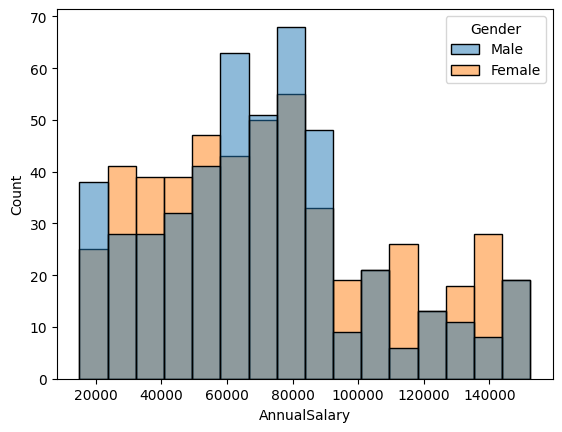

In [13]:
sns.histplot( x='AnnualSalary', data = df, hue='Gender' )

<AxesSubplot:xlabel='Age', ylabel='Count'>

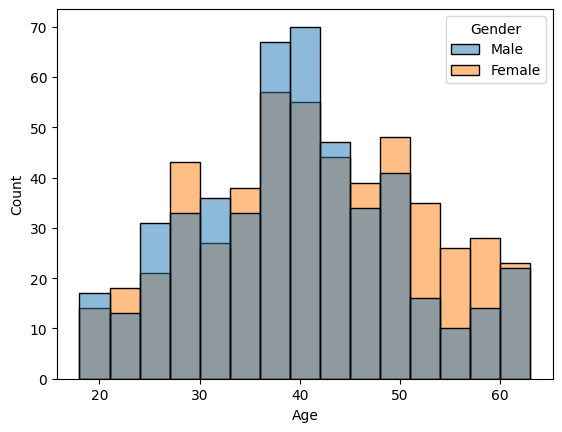

In [14]:
sns.histplot( x='Age', data=df, hue='Gender' )

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

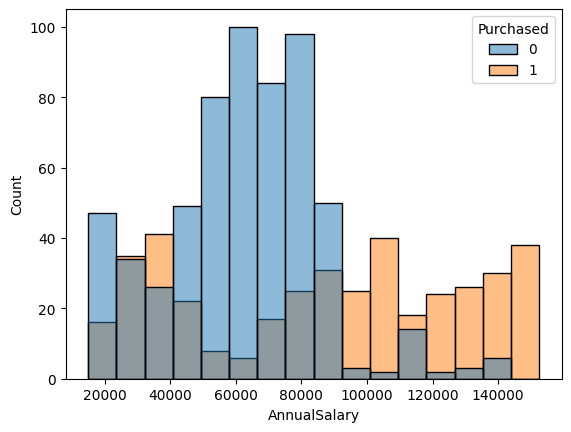

In [15]:
sns.histplot( x='AnnualSalary', data=df, hue='Purchased' )

<AxesSubplot:xlabel='Age', ylabel='Count'>

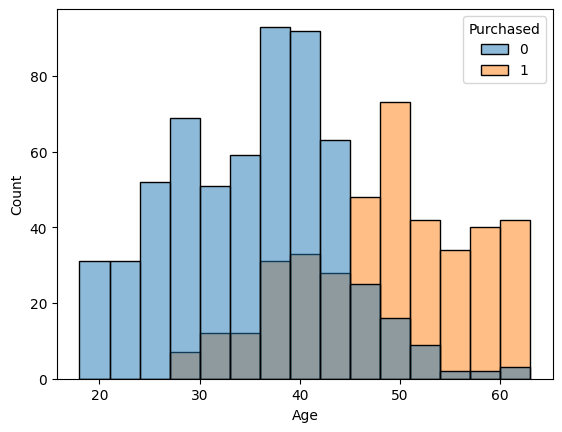

In [16]:
# La compra esta basstante relaciionada con la edad del cliente
sns.histplot( x='Age', data=df, hue='Purchased' )

In [17]:
# Visualizamos la correlacion de la compra con las demas columnas
df.corr()['Purchased'].sort_values()

C:\Users\usuario\AppData\Local\Temp\ipykernel_16436\3835237947.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Purchased'].sort_values()


AnnualSalary    0.364974
Age             0.616036
Purchased       1.000000
Name: Purchased, dtype: float64

## Ingeniería de Características

In [18]:
# DataFrame original
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [19]:
'''
Toma el dataframe df, encuentra todas las columnas categóricas y crea columnas 
de indicadores para cada categoría. Luego, sobrescribe el dataframe original 
con el nuevo dataframe que contiene las columnas de indicadores. 
(reemplaza  las columnas categoricas por valores numerico, borra esas columnas para agregar las nuevas columnas)
'''
df = pd.get_dummies(df, drop_first=False)

In [20]:
# DataFrame con variable categóricas 
df.head()

,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,35,20000,0,0,1
1,40,43500,0,0,1
2,49,74000,0,0,1
3,40,107500,1,0,1
4,25,79000,0,0,1


In [21]:
# Eliminamos la columna Gender_Male
df = df.drop( 'Gender_Male', axis=1 )
df.head()

,Age,AnnualSalary,Purchased,Gender_Female
0,35,20000,0,0
1,40,43500,0,0
2,49,74000,0,0
3,40,107500,1,0
4,25,79000,0,0


## Entrenamos a nuestro modelo

### Instanciamos nuestras variables X, y

In [22]:
# Cargamos los datos del dataframe en dos variables
X = df[ [ 'AnnualSalary', 'Age', 'Gender_Female' ] ].copy() # variable independiente
y = df['Purchased'].copy() # variable dependiente

In [23]:
# Dividimos el escalar en datos de prueba 30% y de datos de entrenamiento 70%.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3 )

In [24]:
# Estandarizamos X_train X_test
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform( X_train )
scaled_X_test = scaler.fit_transform( X_test )

In [25]:
# Función para calcular la precisión del modelo
def modelperformance( predictions ):
    print( 'El puntaje de precisión del modelo es: ', accuracy_score(y_test, predictions) )

### Regresión Logística

In [26]:
# instanciamos el modelo de regresión logística
log_model = LogisticRegression()
# entrenamos el modelo
log_model.fit( scaled_X_train, y_train.values.ravel() ) # transformamos y_train en una matriz unidimensional
# Realizamos predicciones utilizando el modelo
log_predictions = log_model.predict( scaled_X_test )
# Calcular la precisión del modelo
modelperformance( log_predictions )

El puntaje de precisión del modelo es:  0.8166666666666667


### Vecinos más cercanos

Existen 2 métodos para encontrar los valores óptimos para entrenar el modelo:

1. Método del Codo (buscar los valores manualmente).
2. Método GridSearchCV

#### Método del Codo

In [27]:
# Se utilizará para almacenar los errores de prueba del modelo para diferentes valores de `k`
test_errors = []
# Este bucle recorrerá diferentes valores de k para evaluar el rendimiento del modelo con cada valor.
for k in range(1, 30):
    # Instancia del clasificador KNN con el valor k como el número de vecinos más cercanos a considerar.
    knn_model = KNeighborsClassifier( n_neighbors=k )
    # Entrenamos el modelo
    knn_model.fit( scaled_X_train, y_train.values.ravel() )
    # Realizamos predicciones
    knn_pred = knn_model.predict( scaled_X_test )
    # Calcula el error de prueba del modelo, que se define como 1 - el puntaje de precisión
    test_errors_rate = 1 - accuracy_score( y_test, knn_pred )
    # Almacenamos los errores para cada valor de k
    test_errors.append( test_errors_rate )

* Gráfica de los errores de cada vecino

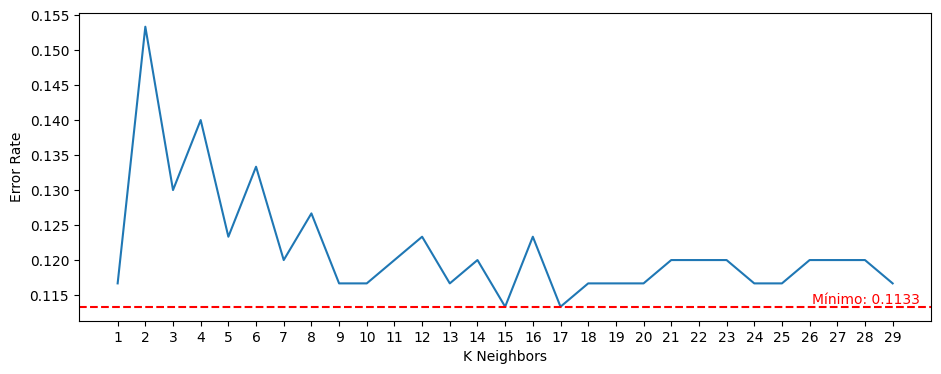

In [28]:
plt.figure( figsize=(11, 4) )

# El eje x de la gráfica representa los valores del rango de k
# EL eje y representa las tazas de error calculados para cada valor de k
plt.plot( range(1, 30), test_errors )
plt.ylabel( "Error Rate" )
plt.xlabel( "K Neighbors" )

# Agregamos al eje x valores del 1 al 29
plt.xticks(range(1, 30))  # Agregar esta línea

# Encontrar el índice del valor mínimo
min_index = np.argmin(test_errors)
min_value = test_errors[min_index]

# Trazar una línea horizontal en el valor mínimo
plt.axhline(min_value, color='red', linestyle='--')
plt.text(30, min_value, f'Mínimo: {min_value:.4f}', color='red', ha='right', va='bottom')

plt.show()

* Entrenamos nuestro modelo con el k vecino con menos error

In [29]:
knn_elbowmethod = KNeighborsClassifier( n_neighbors=8 )
knn_elbowmethod.fit( scaled_X_train, y_train.values.ravel() )
knn_pred = knn_model.predict( scaled_X_test )
modelperformance( knn_pred )

El puntaje de precisión del modelo es:  0.8833333333333333


#### Método GridSearchCV

Búsqueda de cuadrícula (GridSearch) para encontrar los mejores parámetros para el clasificador KNeighborsClassifier utilizando validación cruzada.

In [30]:
# Instancia del clasificador
knn = KNeighborsClassifier()
# Lista de valores, que se utilizarán como posibles valores para el hiperparámetro
k_values = list( range(1, 30) )
# Secuencia de pasos con una etapa knn
pipe = Pipeline( steps=[('knn', knn)] )
# Diccionario que indica el nombre del hiperparámetro que se va a ajustar `knn__n_neighbors`
param_grid = {'knn__n_neighbors':k_values}
'''  
GridSearchCV que realizará la búsqueda de cuadrícula utilizando el clasificador pipe 
(que contiene el clasificador KNeighborsClassifier) y los parámetros definidos en 
param_grid. Se utiliza una validación cruzada con 5 divisiones (cv=5) y se utiliza 
la métrica de precisión (scoring="accuracy") para evaluar el rendimiento del modelo
'''
cv_classifier = GridSearchCV( pipe, param_grid, cv=5, scoring="accuracy" )

In [31]:
#  Ajusta el modelo utilizando los datos de entrenamiento
cv_classifier.fit( scaled_X_train, y_train.values.ravel() )
# Los mejores parámetros encontrados durante la búsqueda de cuadrícula
print( cv_classifier.best_params_ )

{'knn__n_neighbors': 5}


In [32]:
# Predicciones utilizando los datos de prueba
pred_gridknn = cv_classifier.predict( scaled_X_test )
# Evalua el rendimiento
modelperformance( pred_gridknn )

El puntaje de precisión del modelo es:  0.8766666666666667


### Aprendizaje Supervisado - Máquinas de vectores de soporte - Support Vector Classifier

In [34]:
from sklearn .svm import SVC
svm = SVC()

param_grid_svr = {  'C':[0.01, 0.1, 0.5],
                    'kernel':['linear', 'rbf', 'poly'],
                }
gridsvr = GridSearchCV( svm, param_grid_svr)


gridsvr.fit( scaled_X_train, y_train.values.ravel() )
pred_svr = gridsvr.predict(scaled_X_test)
modelperformance( pred_svr )


El puntaje de precisión del modelo es:  0.89


### Árboles de decisión

In [38]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit( scaled_X_train, y_train.values.ravel() )

DecisionTreeClassifier()

In [39]:
treepred = treemodel.predict( scaled_X_test )
modelperformance( treepred )

El puntaje de precisión del modelo es:  0.8933333333333333


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier()
n_estimators = [32, 64, 128, 256]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfr = {  'n_estimators':n_estimators, 
                    'max_features':max_features,
                    'bootstrap':bootstrap,
                    'oob_score': oob_score 
                }

gridrfr = GridSearchCV( rfr_model, param_grid_rfr )
gridrfr.fit( scaled_X_train, y_train.values.ravel() )


c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation on

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256],
                         'oob_score': [True, False]})

In [41]:
print( gridrfr.best_params_ )

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32, 'oob_score': False}


In [42]:
rfc = RandomForestClassifier( max_features=3, n_estimators=256, oob_score=True )

In [43]:
rfc.fit( scaled_X_train, y_train.values.ravel() )
predsrfc = rfc.predict( scaled_X_test )
modelperformance( predsrfc )

El puntaje de precisión del modelo es:  0.8733333333333333
